<a href="https://colab.research.google.com/github/Naden-Mohamed/Exercises-and-Assignments-DEPI/blob/main/Unsupervised_ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**1. Data Exploration and Preprocessing**

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [3]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


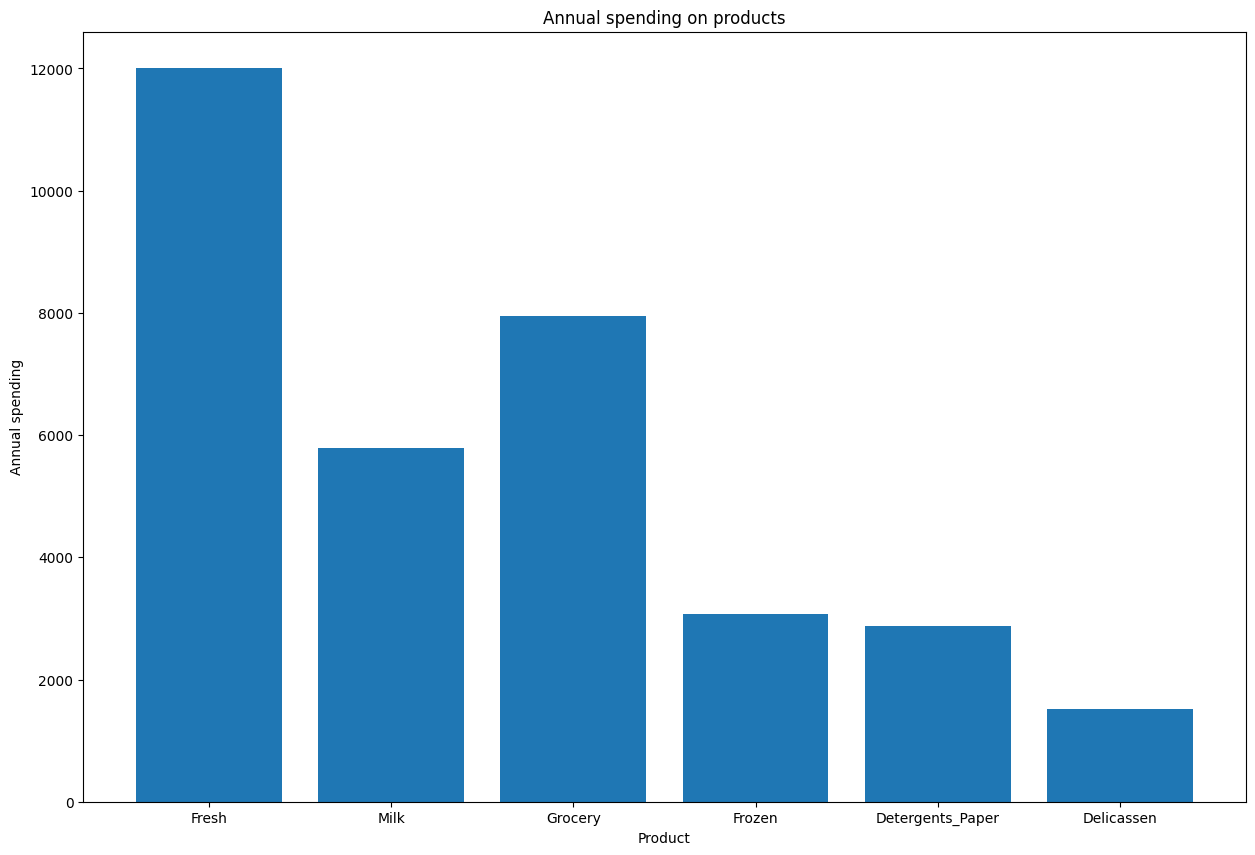

In [11]:
columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
values = df[columns].mean()
plt.figure(figsize=(15,10))
plt.bar(x=values.index, height=values.values)
plt.title("Annual spending on products")
plt.xlabel("Product")
plt.ylabel("Annual spending")
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns])

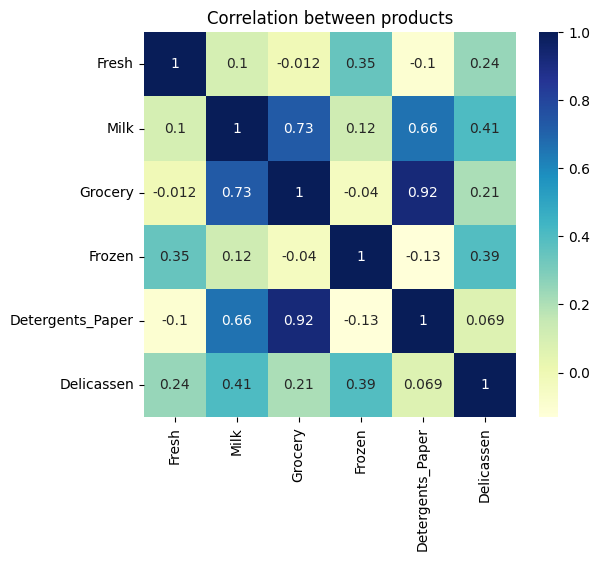

In [18]:
correlation = df[columns].corr()
plt.figure(figsize=(6,5))
sns.heatmap(correlation,cmap="YlGnBu", annot=True)
plt.title("Correlation between products")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Channel'], test_size=0.2, random_state=42)

**2. K-Means Clustering**

In [99]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
K = range(2,8)
fits = []
scores = []
inertia = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_train)
    fits.append(model)
    inertia.append(model.inertia_)
    scores.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

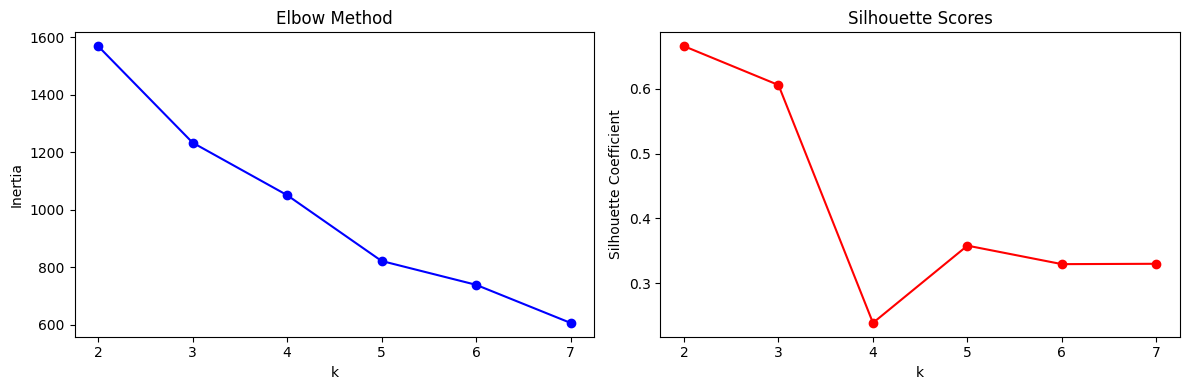

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

#Elbow Method
plt.plot(K, inertia, 'bo-');
plt.title('Elbow Method');
plt.xlabel('k');
plt.ylabel('Inertia')

# Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K, scores, 'ro-');
plt.title('Silhouette Scores');
plt.xlabel('k');
plt.ylabel('Silhouette Coefficient')
plt.tight_layout();
plt.show()

In [96]:
model = KMeans(n_clusters=4, random_state=42, n_init='auto')
model.fit(X_train)
silhouette_score = silhouette_score(X_train, model.labels_, metric='euclidean')
print(f"Silhouette Score: {silhouette_score}")
Davies = metrics.davies_bouldin_score(X_train, model.labels_)
print("Davies Bouldin Score:%0.2f"% Davies)

Silhouette Score: 0.23841151833022803
Davies Bouldin Score:1.21


In [44]:
df['clusters'] = model.fit_predict(df_scaled)
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,3
5,2,3,9413,8259,5126,666,1795,1451,3
6,2,3,12126,3199,6975,480,3140,545,3
7,2,3,7579,4956,9426,1669,3321,2566,3
8,1,3,5963,3648,6192,425,1716,750,3
9,2,3,6006,11093,18881,1159,7425,2098,0


In [103]:
# KMeans cluster analysis
print("KMeans Cluster Centroids")
print(pd.DataFrame(model.cluster_centers_, columns=columns).round(2))

print("\nKMeans Cluster Sizes:")
print(df['clusters'].value_counts())

KMeans Cluster Centroids
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  -0.55  0.40     0.61   -0.33              0.67       -0.07
1  -0.28  2.12     2.25   -0.18              2.26        0.86
2   1.64  1.49     0.60   11.92             -0.34        1.45
3   1.43 -0.18    -0.23    0.47             -0.41        0.35
4  -0.27 -0.43    -0.49   -0.13             -0.44       -0.22
5   1.08  5.11     5.64   -0.09              5.69        0.42
6   1.97  5.18     1.29    6.90             -0.55       16.48

KMeans Cluster Sizes:
clusters
3    314
0    109
2     10
1      7
Name: count, dtype: int64


In [47]:
cluster_summary = df.groupby('clusters')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()
print(cluster_summary.round(1))


            Fresh     Milk  Grocery   Frozen  Detergents_Paper  Delicassen
clusters                                                                  
0          5474.9  10194.2  15587.8   1464.4            6734.6      1642.5
1         40136.9  19452.1  15026.3  23713.7            2374.1     15735.1
2         15964.9  34708.5  48536.9   3054.6           24875.2      2942.8
3         13512.0   3044.4   3850.1   3170.4             854.8      1122.1


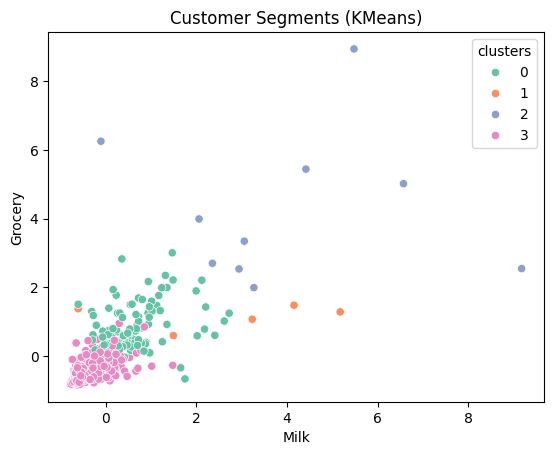

In [51]:
import seaborn as sns
sns.scatterplot(x=df_scaled[:, 1], y=df_scaled[:, 2], hue=df['clusters'], palette='Set2')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Customer Segments (KMeans)')
plt.show()

**3. DBSCAN Clustering**

In [57]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X_train)

In [69]:
from sklearn import metrics
Silhouette_score = metrics.silhouette_score(X_train, db.labels_)
print("Silhouette Score:%0.2f"% Silhouette_score)

Silhouette Score:-0.09


**After mannualy trying different values for eps & min_samples to get better result, these values got the best result**



In [93]:
db = DBSCAN(eps=5, min_samples=4).fit(X_train)
Silhouette_score = metrics.silhouette_score(X_train, db.labels_)
print("Silhouette Score:%0.2f"% Silhouette_score)
Davies = metrics.davies_bouldin_score(X_train, db.labels_)
print("Davies Bouldin Score:%0.2f"% Davies)

Silhouette Score:0.84
Davies Bouldin Score:0.72


**More enhanced way for fine tuning parameters using grid search**

In [109]:
best_params = None
best_sil = -1
for eps in [0.5, 1.0, 1.5, 5]:
    for ms in [4, 5, 10, 15]:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(df_scaled)
        # ignore single cluster/noise
        if len(set(labels)) > 1:
            sil = silhouette_score(df_scaled, labels)
            if sil > best_sil:
                best_sil, best_params = sil, {'eps':eps, 'min_samples':ms}

print(f"Best DBSCAN params: {best_params}, silhouette: {best_sil:.3f}")

Best DBSCAN params: {'eps': 5, 'min_samples': 4}, silhouette: 0.815


In [92]:
clusters = db.fit_predict(df_scaled)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

Number of clusters: 1
Number of noise points: 3


**4. Clustering Evaluation**

In [116]:
from sklearn.metrics import adjusted_rand_score

ari_K = adjusted_rand_score(df['Channel'], df['clusters'])
ari_DB = adjusted_rand_score(df['Channel'], df['DBSCAN_clusters'])
print("Adjusted Rand Score For KMeans:%0.2f"% ari_K)
print("Adjusted Rand Score For DBSCAN:%0.2f"% ari_DB)

Adjusted Rand Score For KMeans:0.51
Adjusted Rand Score For DBSCAN:-0.01


As a score closer to 1 suggests a strong agreement, while a score nearer 0 or negative values imply poor clustering performance relative to random chance.
**The KMeans did a greater job aligns data with known "Channel" labels.**

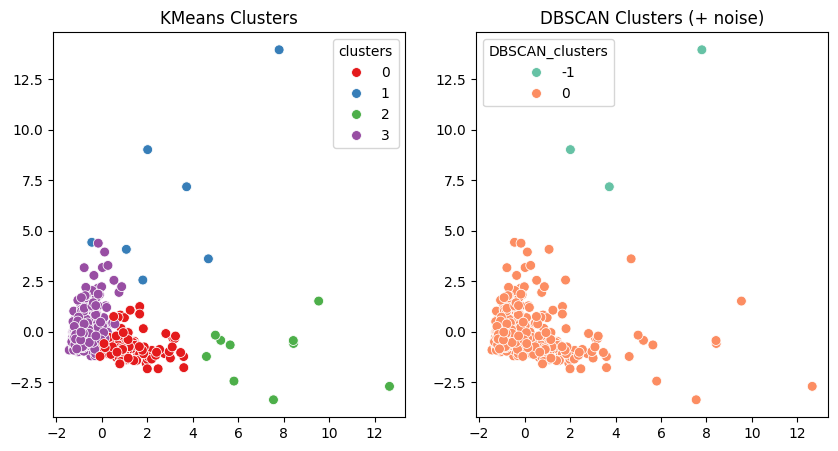

In [117]:
from sklearn.decomposition import PCA
# 9. Visualization via PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['clusters'], palette='Set1', s=50)
plt.title('KMeans Clusters')
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['DBSCAN_clusters'], palette='Set2', s=50)
plt.title('DBSCAN Clusters (+ noise)')
plt.show()

**5. K-Means vs. DBSCAN: The Comparison**

***Comparison Summary***

KMeans:

*  Silhouette Score: 0.23

*  Davies Bouldin Score: 1.21

*  Adjusted Rand Score: 0.51 (good alignment with ground truth)


DBSCAN:

*  Silhouette Score: 0.84 (very high — means excellent cluster cohesion/separation)

*  Davies Bouldin Score: 0.72 (much better than KMeans, cuz higher values are worse)

*  Adjusted Rand Score: -0.01 (worse than random, no alignment with ground truth)